<a href="https://colab.research.google.com/github/patilaakash619/projects-on-machine-learning-and-deep-learing./blob/main/Classification_of_Patients_with_Abnormal_Blood_Pressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Liberies And Datasets

# New Section

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from scipy.stats import mstats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc

In [2]:
dataset=pd.read_csv("Train.csv")

## Data Exploration.

In [3]:
dataset.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,0,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [4]:
dataset.shape

(2000, 15)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [6]:
# statistical summary
dataset.describe()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,1908.000000,2000.000000,2000.000000,2000.000000,442.000000,2000.000000,2000.000000,2000.000000,1758.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.493500,11.710035,0.494817,46.558500,30.081500,0.496000,0.450226,0.509500,25254.424500,24926.097000,251.008532,2.012500,0.356500,0.298000
std,577.494589,0.500083,2.186701,0.291736,17.107832,11.761208,0.500109,0.498080,0.500035,14015.439623,14211.692586,143.651884,0.823822,0.479085,0.457494
min,1.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.000000,0.000000
25%,500.750000,0.000000,10.147500,0.240000,32.000000,20.000000,0.000000,0.000000,0.000000,13605.750000,13151.750000,126.250000,1.000000,0.000000,0.000000
50%,1000.500000,0.000000,11.330000,0.490000,46.000000,30.000000,0.000000,0.000000,1.000000,25353.000000,25046.500000,250.000000,2.000000,0.000000,0.000000
75%,1500.250000,1.000000,12.945000,0.740000,62.000000,40.000000,1.000000,1.000000,1.000000,37382.250000,36839.750000,377.750000,3.000000,1.000000,1.000000
max,2000.000000,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.000000,1.000000


## Analyzing the Dependent Feature or Target Column .

In [7]:
## checking distribution in target column for each class.
dataset['Blood_Pressure_Abnormality'].value_counts()

0    1013
1     987
Name: Blood_Pressure_Abnormality, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

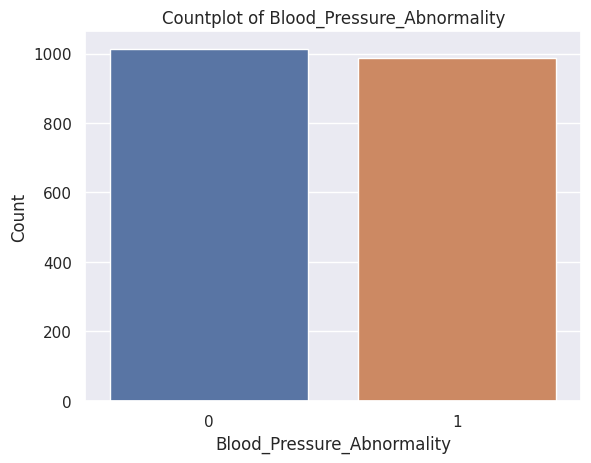

In [8]:
sns.set(style="darkgrid")
sns.countplot(data=dataset, x='Blood_Pressure_Abnormality')
plt.title("Countplot of Blood_Pressure_Abnormality")
plt.xlabel("Blood_Pressure_Abnormality")
plt.ylabel("Count")
plt.show

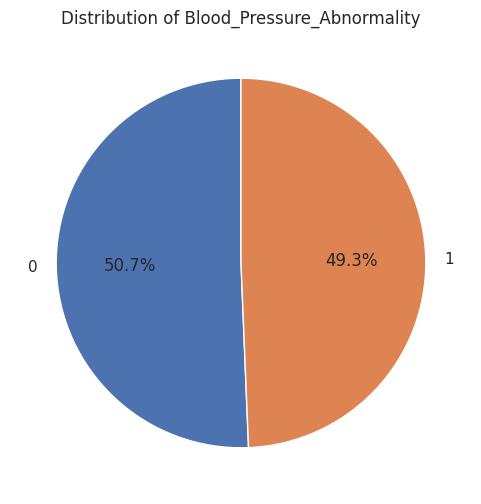

In [9]:
class_counts = dataset['Blood_Pressure_Abnormality'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Blood_Pressure_Abnormality')
plt.show()

## Correlation Matrix And Heat Map.

<Axes: title={'center': 'Correlation with Blood_Pressure_Abnormality'}>

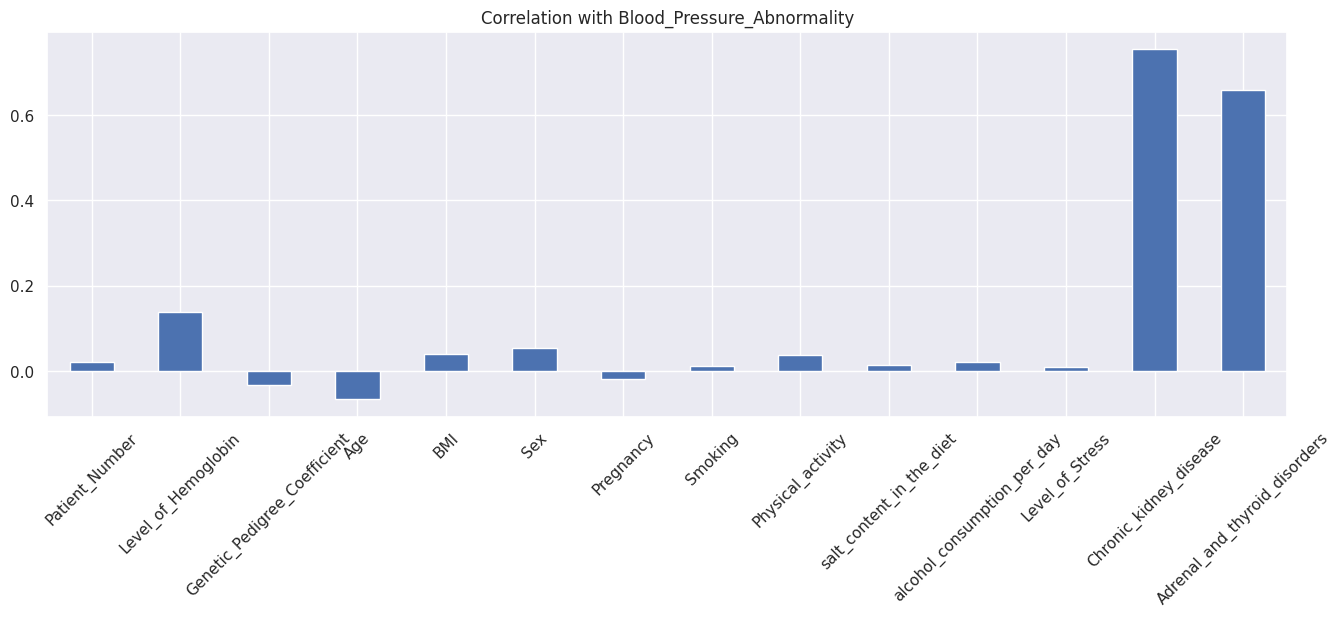

In [10]:
dataset_2 = dataset.drop(columns=['Blood_Pressure_Abnormality'])
dataset_2.corrwith(dataset['Blood_Pressure_Abnormality']).plot.bar(
    figsize=(16,5), title = 'Correlation with Blood_Pressure_Abnormality',
    rot = 45, grid = True)

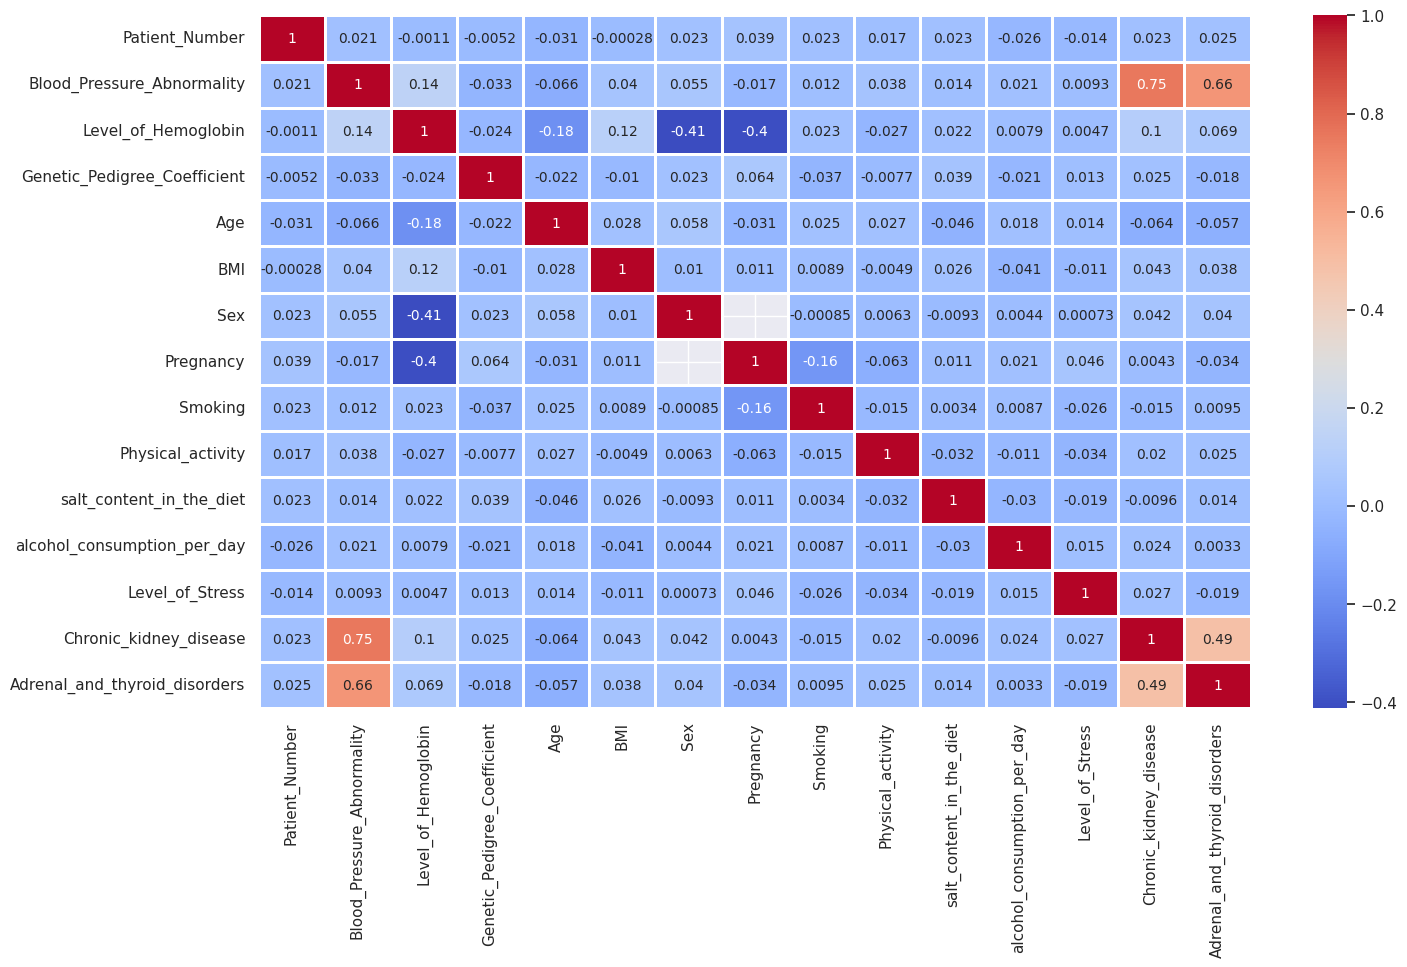

In [11]:
# Create Correlation Matrix.
corr = dataset.corr()

# HEATMAP
plt.figure(figsize=(16,9))
ax = sns.heatmap(corr,annot=True,cmap="coolwarm",linewidths=2 ,annot_kws={"size": 10})

## Histograms .

<ipython-input-12-dac54999177d>:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset[columns].hist(bins=50, ax = ax)


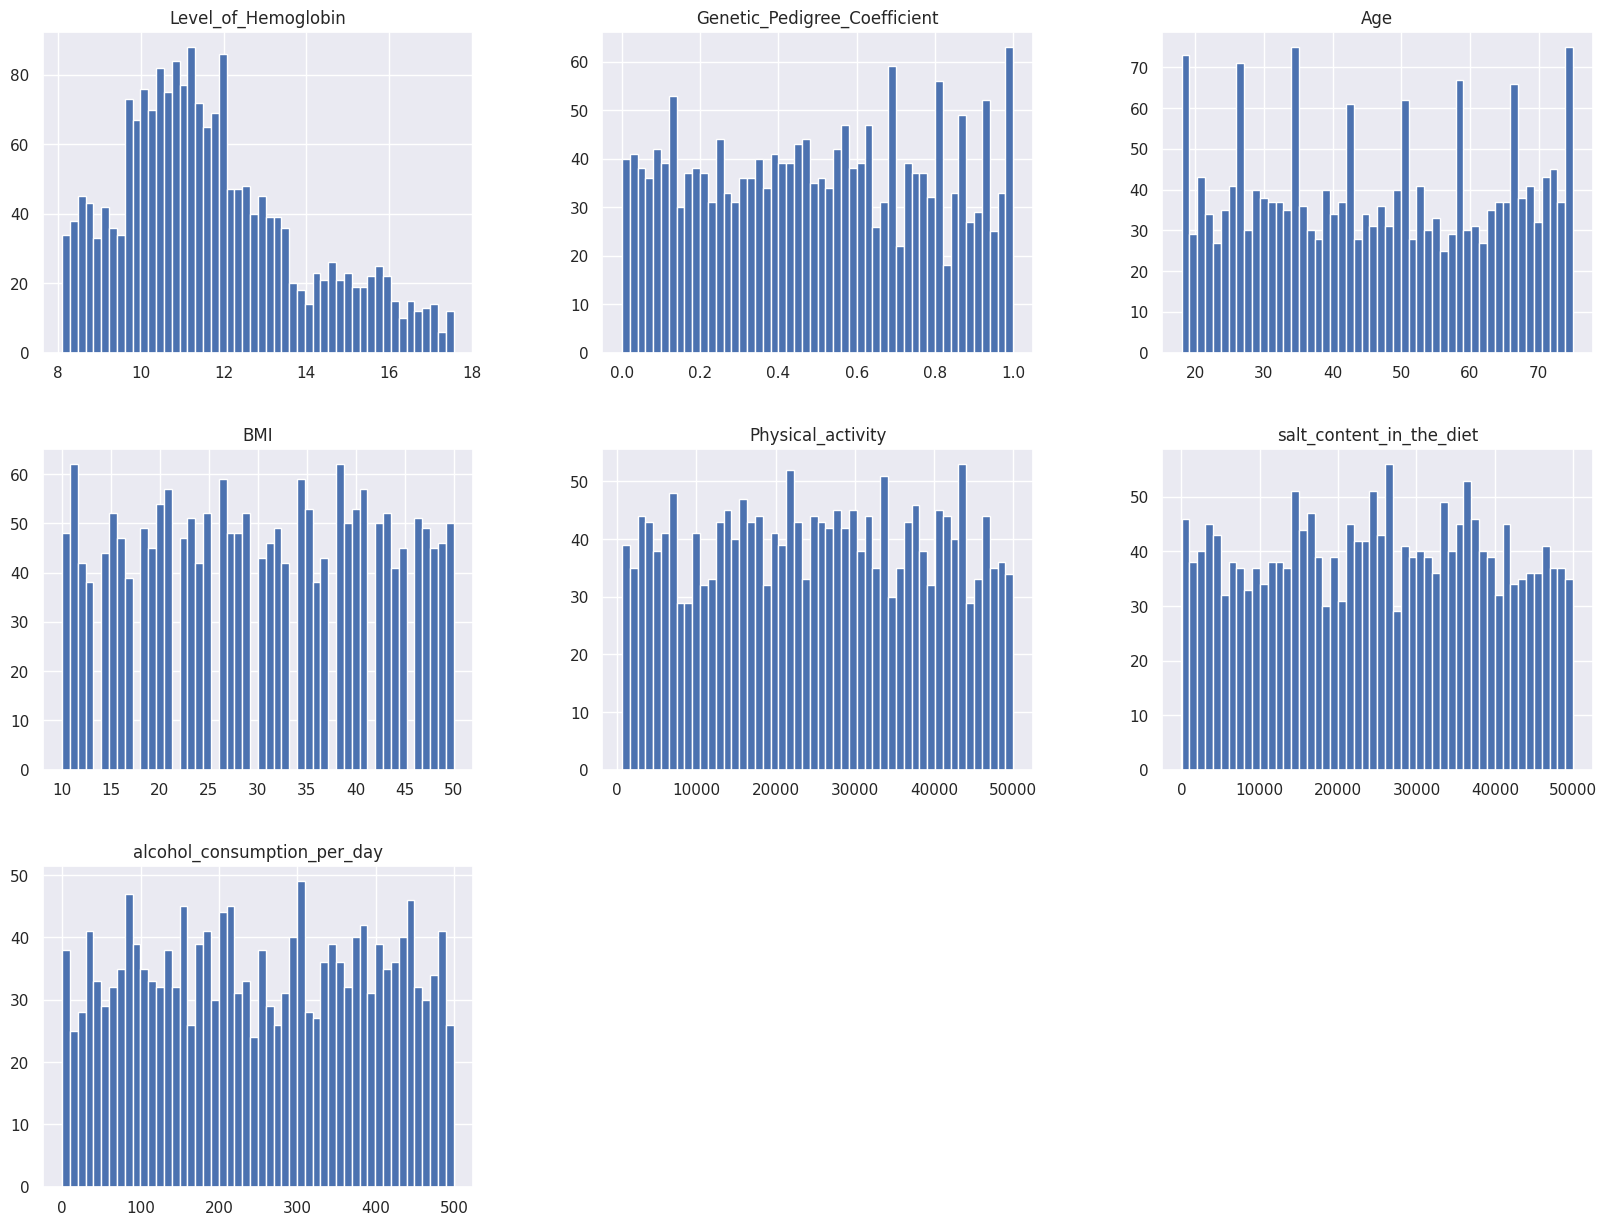

In [12]:
columns = ['Level_of_Hemoglobin','Genetic_Pedigree_Coefficient', 'Age', 'BMI','Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day']

fig = plt.figure(figsize = (20,15))
ax = fig.gca()

dataset[columns].hist(bins=50, ax = ax)
plt.show()

## Dealing with Null Values .

In [13]:
dataset.isna().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [14]:
dataset.isnull().mean() * 100

Patient_Number                    0.0
Blood_Pressure_Abnormality        0.0
Level_of_Hemoglobin               0.0
Genetic_Pedigree_Coefficient      4.6
Age                               0.0
BMI                               0.0
Sex                               0.0
Pregnancy                        77.9
Smoking                           0.0
Physical_activity                 0.0
salt_content_in_the_diet          0.0
alcohol_consumption_per_day      12.1
Level_of_Stress                   0.0
Chronic_kidney_disease            0.0
Adrenal_and_thyroid_disorders     0.0
dtype: float64

<Axes: >

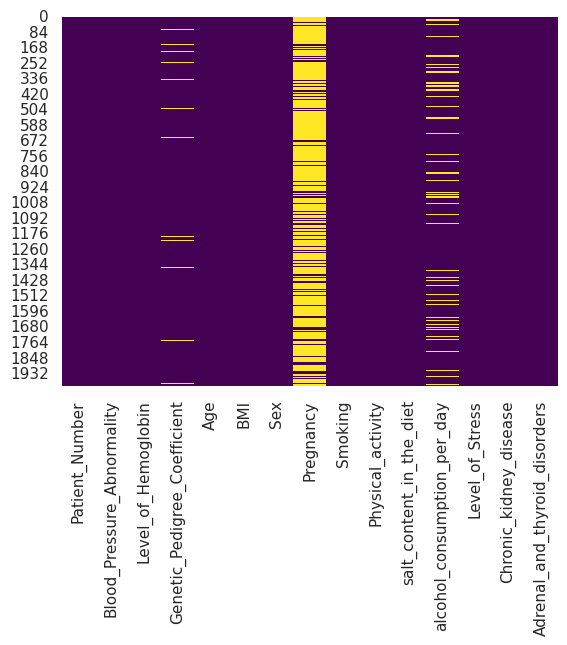

In [15]:
sns.heatmap(dataset.isnull(),cbar = False,cmap = 'viridis')

In [17]:
# Impute missing values of column 'Genetic_Pedigree_Coefficient' & 'alcohol_consumption_per_day' bu KNNImputer

knn_imputer = KNNImputer(n_neighbors=3)
columns_to_impute = ['Genetic_Pedigree_Coefficient','alcohol_consumption_per_day']
dataset[columns_to_impute] = knn_imputer.fit_transform(dataset[columns_to_impute])

In [18]:
dataset.isna().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient        0
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day         0
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [19]:
# Sex : 0 = Male , 1 = Female   # Pregnancy : 0 = No , 1 = Yes
dataset['Sex'].value_counts()

0    1008
1     992
Name: Sex, dtype: int64

In [20]:
dataset[dataset["Sex"]== 1]['Pregnancy'].isnull().value_counts()

True     550
False    442
Name: Pregnancy, dtype: int64

In [21]:
dataset[dataset["Sex"]== 0]['Pregnancy'].isnull().value_counts()

True    1008
Name: Pregnancy, dtype: int64

In [22]:
# replacing NaN values in the "Pregnancy" column with 0 for rows where "Sex " =  0 (Male)
dataset.loc[dataset['Sex'] == 0, 'Pregnancy'] = dataset['Pregnancy'].fillna(0)

In [23]:
dataset["Pregnancy"].isna().sum()

550

In [24]:
mean_age_nan_pregnancy = dataset[dataset['Pregnancy'].isnull()]['Age'].mean()
median_age_nan_pregnancy = dataset[dataset['Pregnancy'].isnull()]['Age'].median()
print(mean_age_nan_pregnancy)
print(median_age_nan_pregnancy)

60.60545454545454
61.0


In [25]:
# replacing  NaN values in the "Pregnancy" column with 0 as mean & median of NaN values in the "Pregnancy" column are >= 55.
dataset['Pregnancy'].fillna(0, inplace=True)

In [26]:
dataset.isna().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

## Dealing with outlier .

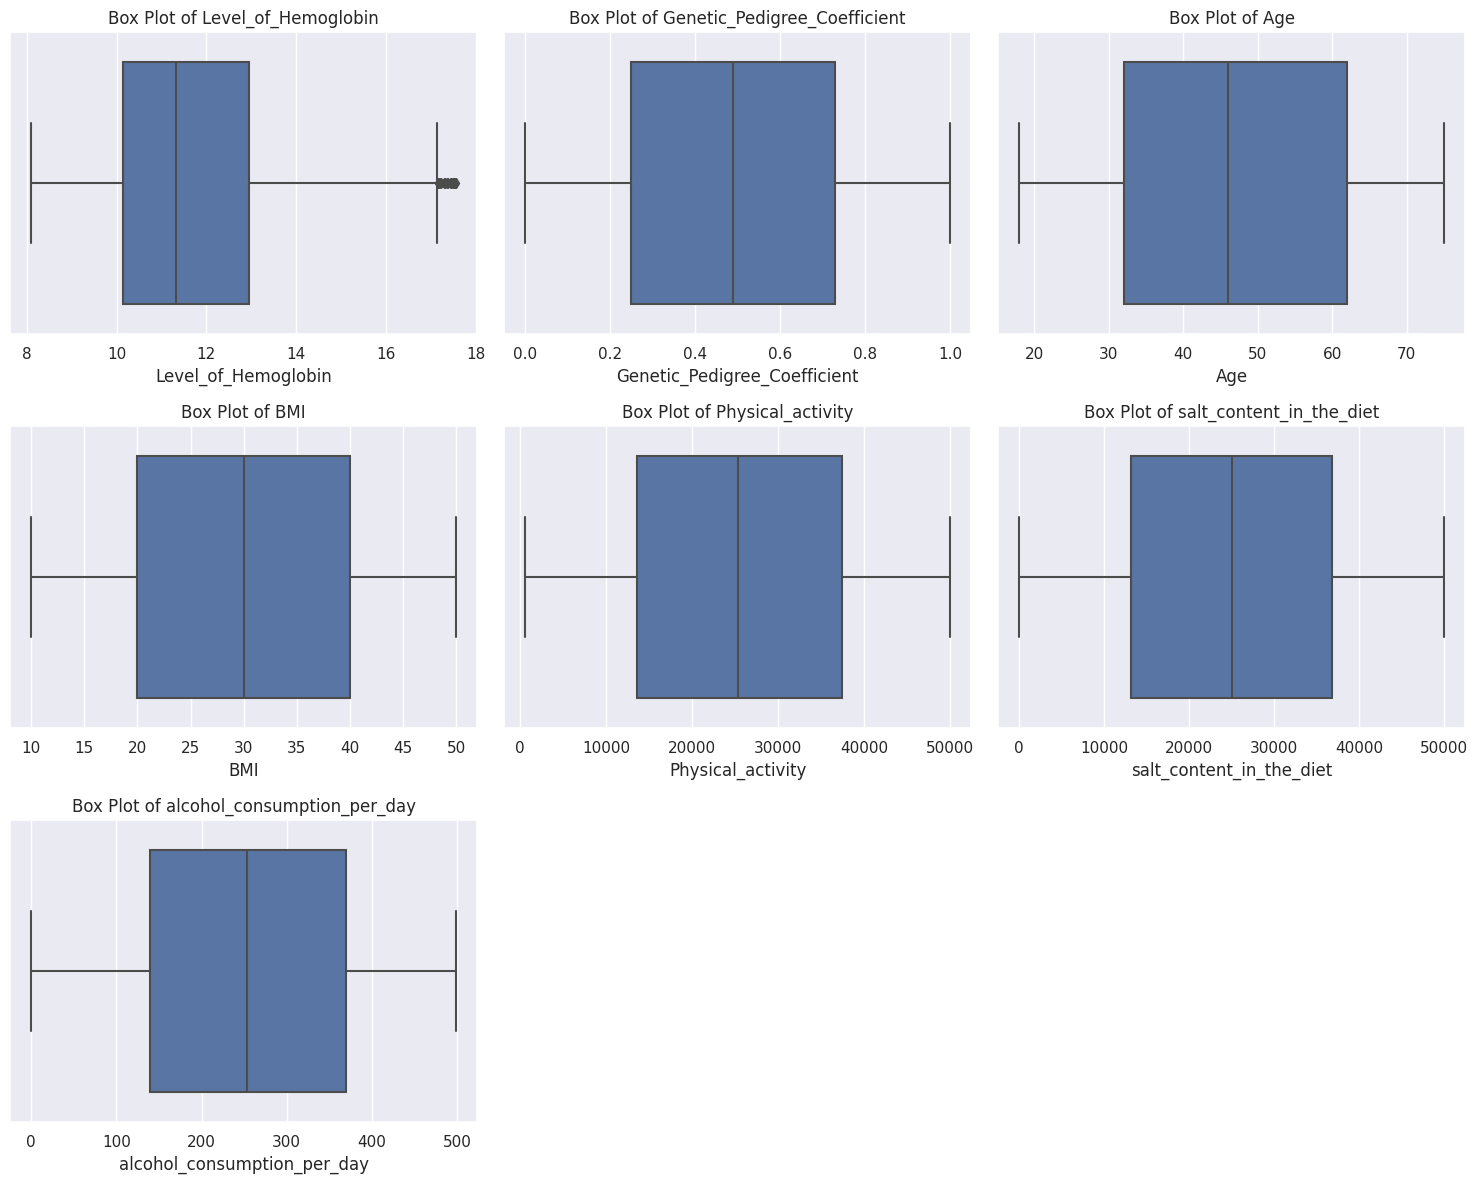

In [27]:
columns_to_check = ['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Physical_activity', 'salt_content_in_the_diet', 'alcohol_consumption_per_day']

plt.figure(figsize=(15, 12))

for i, column in enumerate(columns_to_check):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=dataset[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [30]:
# Winsorizing is a statistical method that addresses outliers in a dataset by constraining extreme values to fall within a specified rang
dataset['Level_of_Hemoglobin'] = mstats.winsorize(dataset['Level_of_Hemoglobin'], limits=[0.05, 0.05])

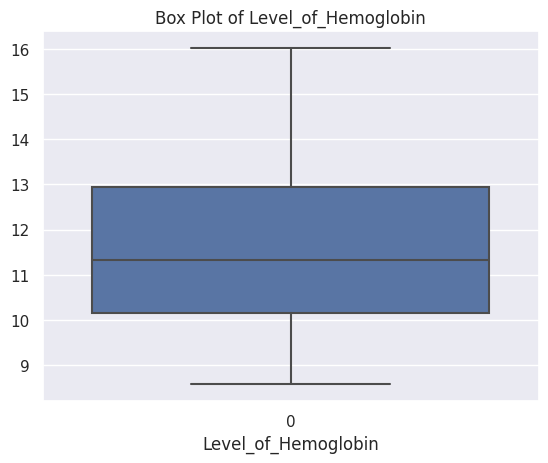

In [29]:
sns.boxplot(dataset['Level_of_Hemoglobin'])
plt.xlabel('Level_of_Hemoglobin')
plt.title('Box Plot of Level_of_Hemoglobin')
plt.show()

## Splitting The Datase into Train and test data.

In [32]:
x = dataset.drop(columns = 'Blood_Pressure_Abnormality')
y = dataset['Blood_Pressure_Abnormality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [33]:
x_train.shape ,y_train.shape ,x_test.shape ,y_test.shape

((1600, 14), (1600,), (400, 14), (400,))

## Data Normalization .

In [35]:
# Function for scaling data to a normalized range using Min-Max Scaling .

mmc = MinMaxScaler()
x_train = mmc.fit_transform(x_train)
x_test = mmc.transform(x_test)

In [36]:
x_train

array([[0.29129129, 0.37146703, 0.68      , ..., 0.5       , 1.        ,
        1.        ],
       [0.07957958, 1.        , 0.29      , ..., 0.        , 0.        ,
        1.        ],
       [0.91441441, 1.        , 0.86      , ..., 0.5       , 0.        ,
        1.        ],
       ...,
       [0.82732733, 0.50067295, 0.96      , ..., 0.5       , 0.        ,
        0.        ],
       [0.27977978, 0.61911171, 0.12      , ..., 0.5       , 1.        ,
        0.        ],
       [0.34234234, 0.22072678, 0.39333333, ..., 0.5       , 1.        ,
        1.        ]])

In [37]:
x_test

array([[0.2027027 , 0.2974428 , 0.75      , ..., 0.5       , 0.        ,
        0.        ],
       [0.5955956 , 0.45625841, 0.05      , ..., 1.        , 1.        ,
        1.        ],
       [0.56656657, 0.        , 0.84      , ..., 0.5       , 0.        ,
        0.        ],
       ...,
       [0.90590591, 0.78196501, 0.04      , ..., 0.5       , 1.        ,
        1.        ],
       [0.87237237, 0.94751009, 0.9       , ..., 1.        , 1.        ,
        1.        ],
       [0.28178178, 0.54508748, 0.53      , ..., 1.        , 0.        ,
        0.        ]])

# Building The Model.

## 1.Logistic regression .

In [39]:
# Creating a Logistic regression Classifier .
classifier_lr = LogisticRegression()

# Training the model .
classifier_lr.fit(x_train,y_train)

# predict values using the testing data.
y_pred = classifier_lr.predict(x_test)

In [41]:
# Metrics Calculation : Function for evaluating various metrics to assess the model's performance on the test dataset.

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.96,1.0,0.916667,0.956522


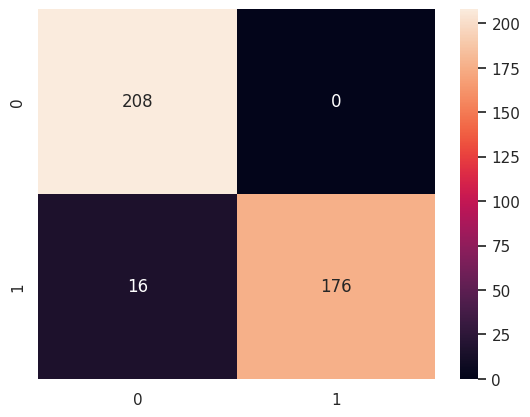

In [42]:
# confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

## 2 Random Forest Classifier.

In [44]:
# Creating a RandomForestClassifier .
classifier_rf = RandomForestClassifier()

# Training the model .
classifier_rf.fit(x_train,y_train)

# predict values using the testing data.
y_pred = classifier_rf.predict(x_test)

In [45]:
# Metrics Calculation : Function for evaluating various metrics to assess the model's performance on the test dataset.
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.9600,1.000000,0.916667,0.956522
1,Random Forest,0.9725,0.973822,0.968750,0.971279


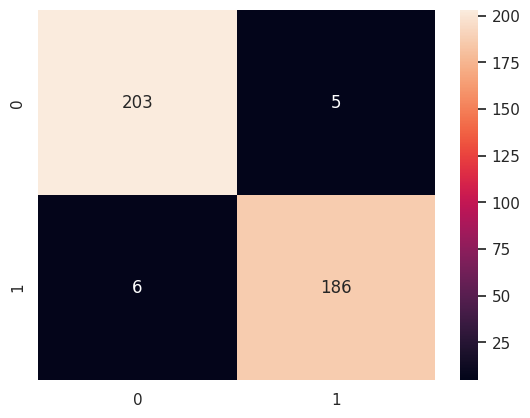

In [46]:
# confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

## 3.Support Vector Machine .

In [48]:
# Creating a Support Vector Machine Classifier .
classifier_svc = SVC()

# Training the model .
classifier_svc.fit(x_train,y_train)

# predict values using the testing data.
y_pred = classifier_svc.predict(x_test)

In [49]:
# Metrics Calculation : Function for evaluating various metrics to assess the model's performance on the test dataset.
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.9600,1.000000,0.916667,0.956522
1,Random Forest,0.9725,0.973822,0.968750,0.971279
2,SVM,0.9575,0.994350,0.916667,0.953930


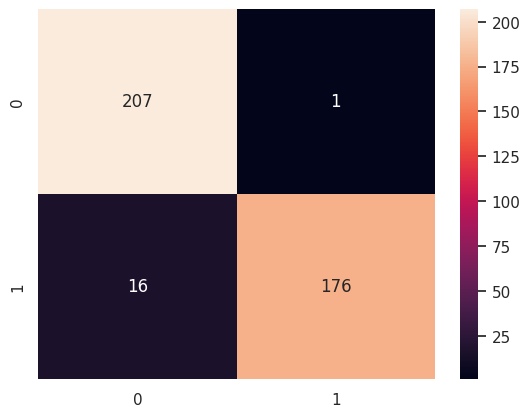

In [50]:
# confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

#  ROC and AUC curves.

## ROC and AUC curves RandomForestClassifier .

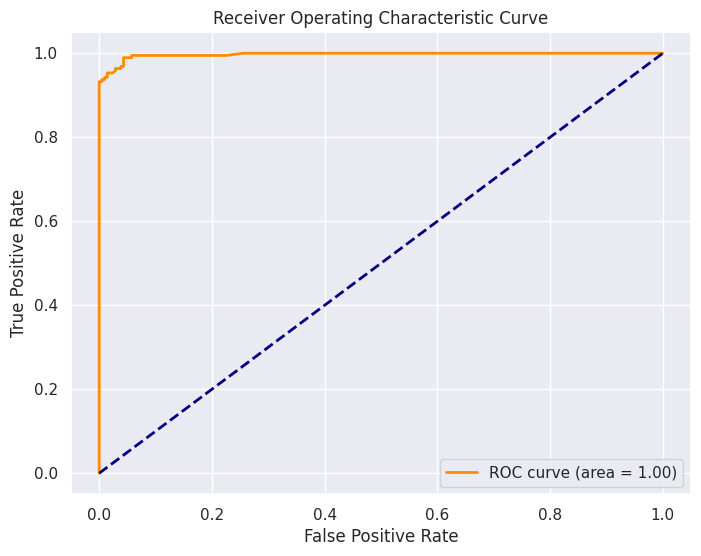

AUC Score: 0.9968324318910257


In [67]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

##  ROC and AUC curves for three different models (LR, RF and SVM) .

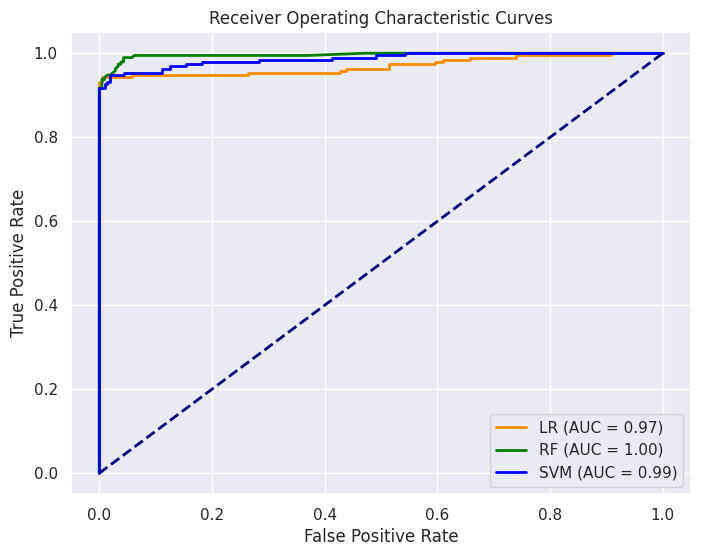

In [64]:
# Plotting ROC curves for all three models
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='LR (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='RF (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_svc, tpr_svc, color='blue', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# "After comprehensive evaluation of three models—Logistic Regression, Random Forest Classifier, and Support Vector Machine—on our dataset,
we found that the Random Forest Classifier exhibited the highest accuracy of 97.25%. Consequently, based on its superior performance,
we have selected the Random Forest Classifier as our final and preferred model for this task."